In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Load Data

First step is to ingest all the data we have available and merge them into a flattened datastructure containing all measurements. Indexes are ignored and rewritten to allow all readings to be added to the DF:

In [26]:
# parse the labels.csv
labels = pd.read_csv('labels.csv', index_col=0)

# grab filenames from the data directory
filenames = os.listdir('data')

dataframes = []

# parse and concatenate all csv files into df
for filename in filenames:
  if filename.endswith('.csv'):
    batch = pd.read_csv(os.path.join('data',filename), index_col=0)
    batch['batch'] = int(filename.replace('.csv', ''))
    dataframes.append(batch)

df = pd.concat(dataframes, ignore_index=True)
# print(df[:10])


In [27]:
# add label column (if it is not already available)
if (not 'label' in df.columns):
  df = df.merge(labels, left_on=["batch"], right_on=["id"])

# drop batch column (if it is not already available)
if ('batch' in df.columns):
  df.drop('batch', axis=1, inplace=True)

def time_to_float(inputstr):
  hours, minutes, seconds = map(float, inputstr.split(':'))
  # return hours * 3600 + minutes * 60 + seconds

  # this is sufficient because hours should always be 0
  return minutes * 60 + seconds

df['label'] = df['label'].astype('category')
df['zeit'] = df['zeit'].apply(time_to_float)

# print(df[:10])
# print(df['label'].value_counts())


# Data Visualisation

In [28]:
sensors = df['sensorid'].unique()

if not os.path.exists('plots'):
  os.makedirs('plots')

for sensor in sensors:
  fig = px.scatter(df[df['sensorid'] == sensor], x='zeit', y='messwert', color='label')
  # fig.show(observed=False, interactive=False)
  fig.write_image(os.path.join('plots', f'{sensor}.png'))


/home/nimblebyte/workspace/.venv/lib64/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/nimblebyte/workspace/.venv/lib64/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/nimblebyte/workspace/.venv/lib64/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/hom

# Modelling

## Single Random Forest

In [29]:
X = df[['zeit','messwert','sensorid']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

clf = RandomForestClassifier(max_depth=8, n_jobs=8, max_features=3, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, max_features=3, n_jobs=8, random_state=42)

## Random Forst per Sensor

## Support Vector Machines

## Convoluted Neural Network

## Gradient Boosting

# Evaluation

## Single Random Forest

0.41733100784499255


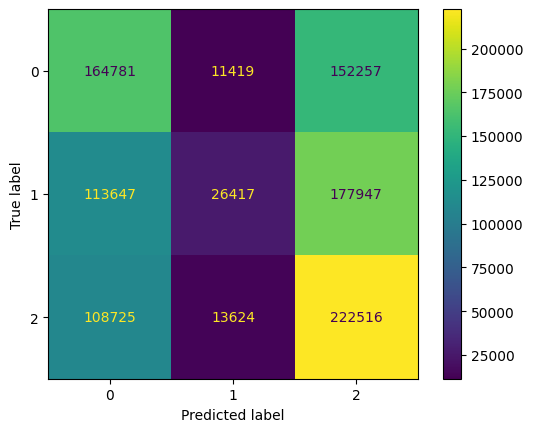

In [30]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


## Random Forest per Sensor

## Support Vector Machines

## Convoluted Neural Network

## Gradient Boosting